In [1]:
# Importar bibliotecas necessárias
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 1. Realizar upload da imagem
filename1 = 'Images\Mao.jpg'
filename2 = 'Images\handpicture2.jpg'
image1 = cv2.imread(filename1)
image2 = cv2.imread(filename2)

In [3]:
# Verificar se a imagem foi carregada corretamente
if image1 is None:
    print("Erro: Não foi possível carregar a imagem 1. Verifique o caminho.")
    exit()
if image2 is None:
    print("Erro: Não foi possível carregar a imagem 2. Verifique o caminho.")
    exit()

In [4]:
# Converter a imagem de BGR (OpenCV) para RGB (Matplotlib)
image_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

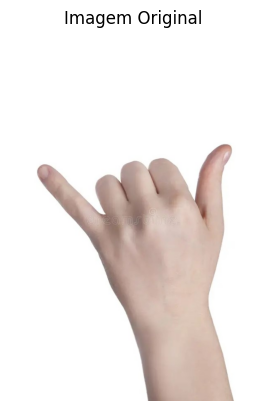

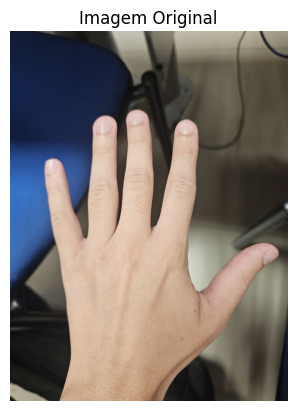

In [5]:
# Exibir a imagem original 1
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Exibir a imagem original 2
plt.imshow(image_rgb2)
plt.title('Imagem Original')
plt.axis('off')
plt.show()


In [6]:
# 2. Mudar o espaço de cor para YCrCb (espaço de cor comum para detecção de pele)
image_ycrcb = cv2.cvtColor(image1, cv2.COLOR_BGR2YCrCb)
image_ycrcb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2YCrCb)

In [7]:
# 3. Definir limiares para detecção de pele em YCrCb
# Esses valores podem ser ajustados conforme necessário
lower_skin = np.array([0, 135, 85], dtype=np.uint8)
upper_skin = np.array([255, 180, 135], dtype=np.uint8)

In [8]:
# Criar uma máscara para a pele
skin_mask = cv2.inRange(image_ycrcb, lower_skin, upper_skin)
skin_mask2 = cv2.inRange(image_ycrcb2, lower_skin, upper_skin)

# Aplicar a máscara na imagem original
skin_detected = cv2.bitwise_and(image_rgb, image_rgb, mask=skin_mask)
skin_detected2 = cv2.bitwise_and(image_rgb2, image_rgb2, mask=skin_mask2)

# Exibir a máscara e a imagem com a pele detectada
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

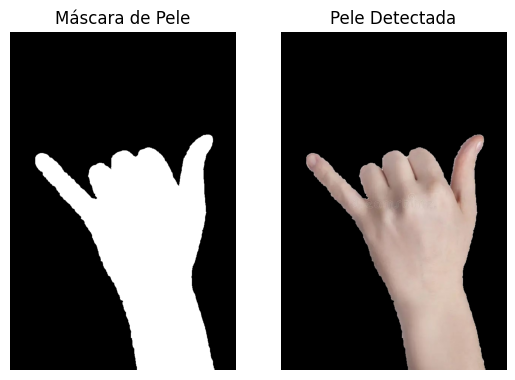

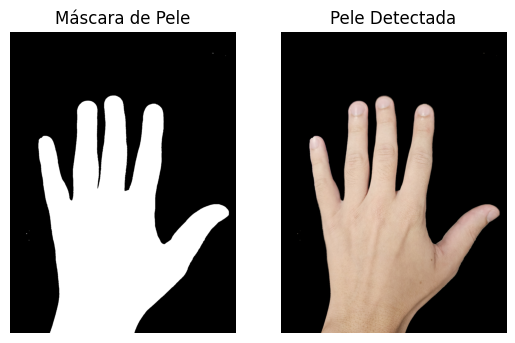

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(skin_mask, cmap='gray')
plt.title('Máscara de Pele')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skin_detected)
plt.title('Pele Detectada')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(skin_mask2, cmap='gray')
plt.title('Máscara de Pele')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skin_detected2)
plt.title('Pele Detectada')
plt.axis('off')

plt.show()

In [10]:
# 4. Verificar se a pele foi detectada
if np.any(skin_mask):
    print("Pele detectada na imagem 1.")
else:
    print("Nenhuma pele detectada na imagem 1.")

if np.any(skin_mask2):
    print("Pele detectada na imagem 2.")
else:
    print("Nenhuma pele detectada na imagem 2.")

Pele detectada na imagem 1.
Pele detectada na imagem 2.


In [11]:
# 5. Recortar a região de interesse (ROI) e salvar a imagem
# Encontrar os contornos na máscara
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(skin_mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
# Desenhar os contornos na imagem original
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
image_with_contours2 = image_rgb2.copy()
cv2.drawContours(image_with_contours2, contours2, -1, (0, 255, 0), 2)

array([[[  9,  20,  38],
        [  9,  20,  38],
        [ 12,  23,  41],
        ...,
        [157, 152, 132],
        [160, 155, 135],
        [157, 152, 132]],

       [[ 12,  23,  41],
        [ 13,  24,  42],
        [ 15,  26,  44],
        ...,
        [161, 156, 136],
        [163, 158, 138],
        [151, 146, 126]],

       [[ 14,  25,  45],
        [ 14,  25,  45],
        [ 14,  25,  45],
        ...,
        [160, 155, 135],
        [163, 158, 138],
        [155, 150, 130]],

       ...,

       [[ 31,  33,  28],
        [ 34,  36,  31],
        [ 34,  35,  30],
        ...,
        [  5,   8,  17],
        [ 14,  17,  26],
        [ 20,  23,  32]],

       [[ 32,  34,  29],
        [ 33,  35,  30],
        [ 37,  38,  33],
        ...,
        [ 11,  14,  23],
        [ 17,  20,  29],
        [ 18,  21,  30]],

       [[ 33,  35,  30],
        [ 26,  28,  23],
        [ 41,  42,  37],
        ...,
        [ 22,  25,  34],
        [ 22,  25,  34],
        [ 11,  14,  23]]

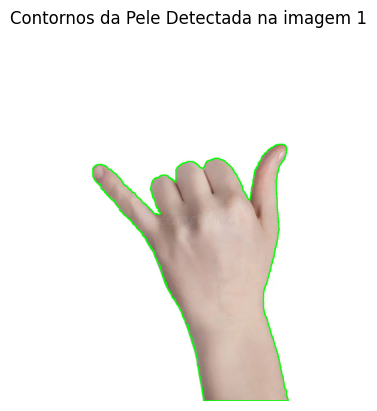

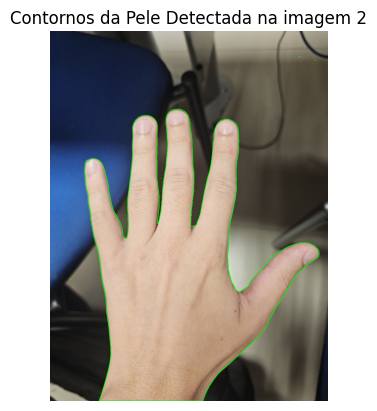

In [13]:
# Exibir a imagem com os contornos
plt.imshow(image_with_contours)
plt.title('Contornos da Pele Detectada na imagem 1')
plt.axis('off')
plt.show()

plt.imshow(image_with_contours2)
plt.title('Contornos da Pele Detectada na imagem 2')
plt.axis('off')
plt.show()

In [14]:
# Salvar a imagem com a pele detectada
cv2.imwrite('skin_detected.jpg', cv2.cvtColor(skin_detected, cv2.COLOR_RGB2BGR))
print("Imagem com pele detectada salva como 'skin_detected.jpg'.")

cv2.imwrite('skin_detected2.jpg', cv2.cvtColor(skin_detected2, cv2.COLOR_RGB2BGR))
print("Imagem com pele detectada salva como 'skin_detected2.jpg'.")


Imagem com pele detectada salva como 'skin_detected.jpg'.
Imagem com pele detectada salva como 'skin_detected2.jpg'.


In [ ]:
# Salvar a imagem com os contornos
cv2.imwrite('skin_contours.jpg', cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))
print("Imagem com contornos salva como 'skin_contours.jpg'.")

cv2.imwrite('skin_contours2.jpg', cv2.cvtColor(image_with_contours2, cv2.COLOR_RGB2BGR))
print("Imagem com contornos salva como 'skin_contours2.jpg'.")

Imagem com contornos salva como 'skin_contours.jpg'.


A pele foi detectada?
Sim, o código verifica se há pixels detectados como pele nas duas imagens e imprime uma mensagem indicando se a pele foi detectada.

Como é possível saber se a pele foi detectada?
A detecção é feita utilizando uma máscara binária (skin_mask e skin_mask2) criada a partir de limiares no espaço de cor YCrCb. Se houver qualquer pixel diferente de zero na máscara, significa que a pele foi detectada.

Foi realizada alguma alteração na região de interesse?
Sim, o código encontra os contornos das regiões detectadas como pele e desenha esses contornos nas imagens originais. Além disso, há um comentário sugerindo o recorte da região de interesse (ROI), mas o recorte em si não foi implementado, apenas a detecção e desenho dos contornos.

Foi necessário alterar os limiares presentes nos slides para melhorar a detecção?
Não foi necessário alterar os limiares.

Recorte a região de interesse e salve a foto com seus valores originais e valores alterados
O código salva as imagens com a pele detectada e com os contornos desenhados, mas não realiza o recorte da região de interesse. Para recortar e salvar a ROI, seria necessário implementar essa etapa adicional.